In [1]:
import numpy as np
import os
import pandas as pd 
import sklearn.linear_model
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
if not os.path.exists("/home/ayand/use2/Projects/auto_mpg"):
  path=os.path.join("/home/ayand/use2/Projects/", "auto_mpg")
  os.mkdir(path)
os.chdir("/home/ayand/Downloads")
cw_dir=os.getcwd()

In [3]:
def data_extract():    

    with ZipFile(cw_dir+"/archive(1).zip", 'r') as zips:

        zips.printdir()

        print('Extracting the CSV file...')
        zips.extractall("/home/ayand/use2/Projects/auto_mpg")
        print("Done!")

data_extract()

File Name                                             Modified             Size
auto-mpg.csv                                   2019-09-20 18:24:30        18131
Extracting the CSV file...
Done!


In [4]:
auto_data=pd.read_csv("/home/ayand/use2/Projects/auto_mpg"+"/auto-mpg.csv")
auto_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


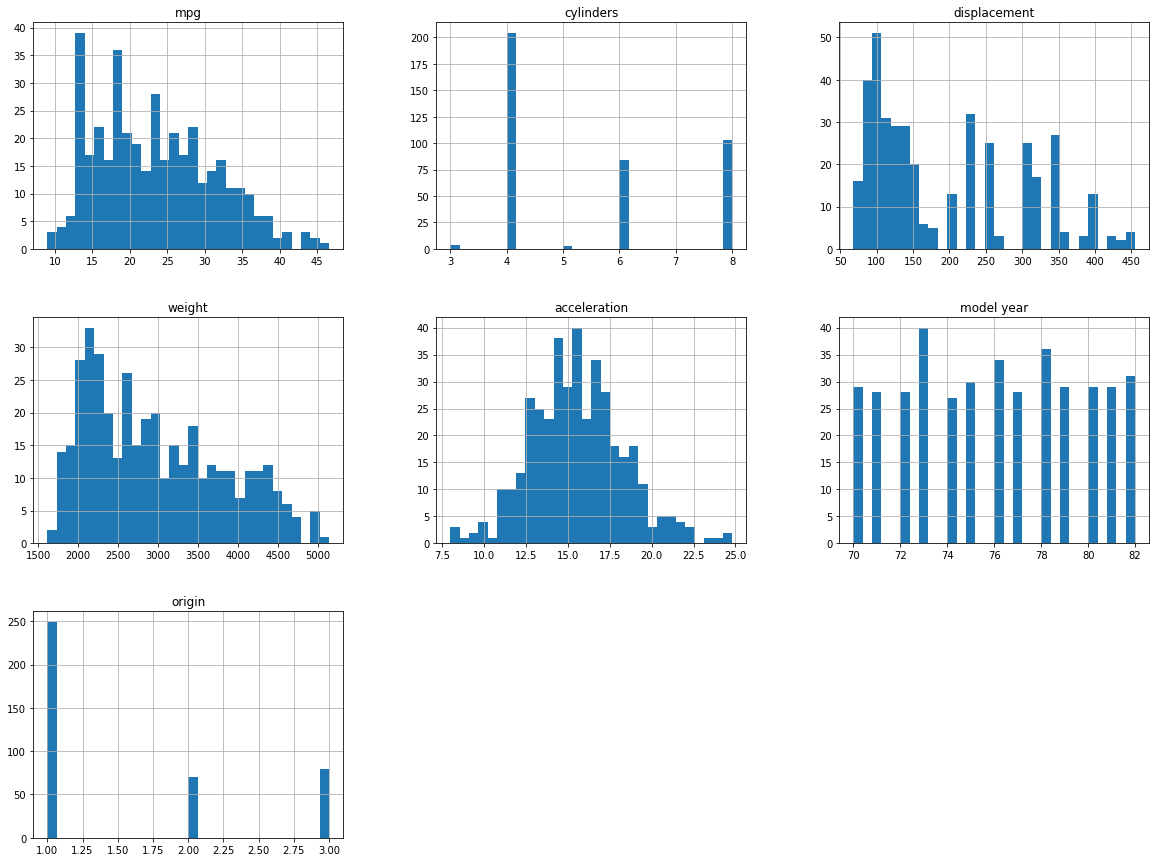

In [5]:
auto_data.info()

auto_data.hist(bins=30, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='cylinders

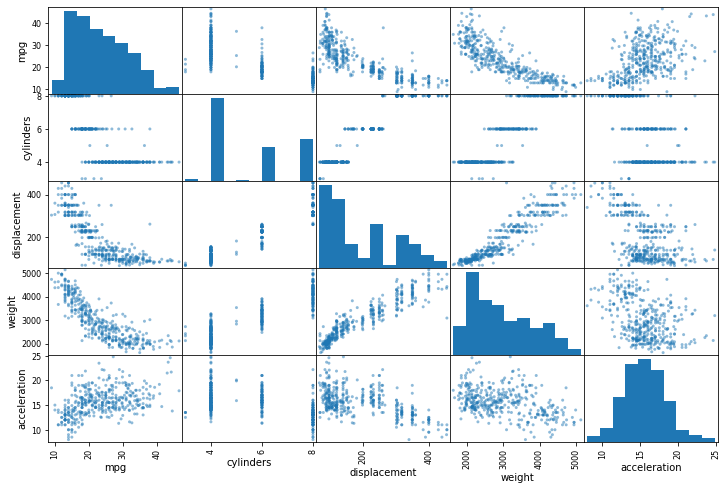

In [6]:
from pandas.plotting import scatter_matrix as s_m
attributes = ["mpg","cylinders","displacement","weight","acceleration"]
s_m(auto_data[attributes], figsize=(12,8))

In [7]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.info())

#correlation(auto_data, 0.8)

In [8]:
print(auto_data.corr())

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(auto_data, test_size=0.2, random_state=42)



In [10]:
if "mpg" in train_set.columns:
  train_labels=train_set["mpg"]
  train_set=train_set.drop("mpg", axis=1)

if "car name" and "horsepower" in train_set.columns:
  train_set_cat=train_set[["car name", "horsepower"]]
  train_set_num=train_set.drop(["car name","horsepower"], axis=1)

train_set_num.info()
train_set_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   weight        318 non-null    int64  
 3   acceleration  318 non-null    float64
 4   model year    318 non-null    int64  
 5   origin        318 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 17.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car name    318 non-null    object
 1   horsepower  318 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


In [11]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
])

num_attribs = list(train_set_num)
cat_attribs = list(train_set_cat)

full_pipeline = ColumnTransformer([
                                   ("num",num_pipeline, num_attribs),
                                   ("cat",OneHotEncoder(), cat_attribs),
])
train_data = full_pipeline.fit_transform(train_set)

print(train_data[0])

  (0, 0)	1.5271881760636379
  (0, 1)	1.0901964962218176
  (0, 2)	0.5528262379412572
  (0, 3)	-1.319333667435329
  (0, 4)	-1.6966673021715355
  (0, 5)	-0.7294936086617171
  (0, 16)	1.0
  (0, 278)	1.0


In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)


LinearRegression()

In [13]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_labels)
print("Predictions:", np.round(lin_reg.predict(some_data_prepared),2))

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
Name: mpg, dtype: float64
Predictions: [16.   26.76 37.   36.1  23.  ]


In [14]:
y_train_pred = lin_reg.predict(train_data)
Actual = []
Prediction = []
Squared_error = []

for i, j in zip(train_labels, y_train_pred):
    Actual.append(i)
    Prediction.append(round(j,2))
    Squared_error.append(round((i-j)**2, 2))

dic = {
        "Actual": Actual,
        "Prediction":Prediction,
        "Squared_Error":Squared_error
}
chart = pd.DataFrame(dic)
chart.head(100)


,Actual,Prediction,Squared_Error
0,16.0,16.00,0.00
1,27.0,26.76,0.06
2,37.0,37.00,0.00
3,36.1,36.10,0.00
4,23.0,23.00,0.00
...,...,...,...
95,18.0,17.83,0.03
96,18.5,18.50,0.00
97,13.0,13.00,0.00
98,26.0,26.00,0.00


In [15]:
print("MSE: {}".format(chart["Squared_Error"].sum()/chart["Squared_Error"].count()))
print("Total Element: {}".format(chart["Squared_Error"].count()))
print("Total Error: {}".format(chart["Squared_Error"].sum()))

MSE: 0.19003144654088053
Total Element: 318
Total Error: 60.43000000000001
